# 데이터

In [4]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

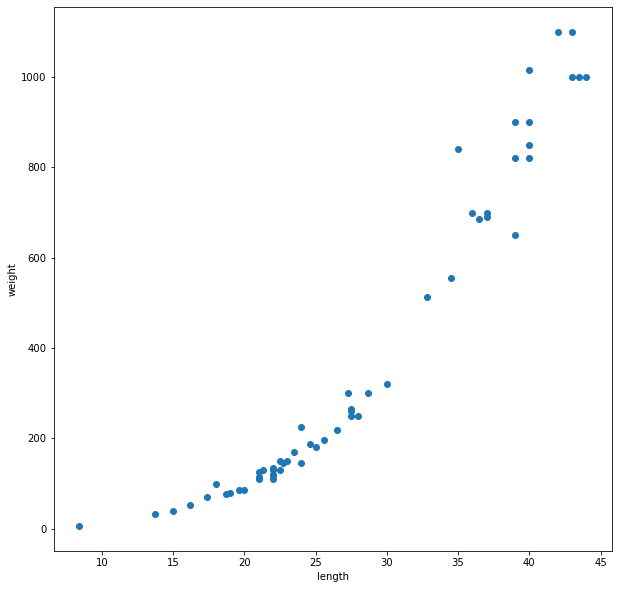

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10),facecolor='white')
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련 세트 준비

In [6]:
from sklearn.model_selection import train_test_split

#훈련 세트와 테스트 세트 구분
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42) #분류가 아니므로 stratify없어도 됨

#사이킷런에 사용하기위해 2차원 배열로 변경->reshape에 (-1,1)을 주면 열이 1개이고 나머지는 행으로 한다는 뜻
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor #최근접 이웃 회귀 클래스

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target) #결정계수(R^2) 반환. 회귀 문제의 score(정확도)는 사실상 정확한 값을 맞추기 어렵다.
#결정계수는 예측이 타깃에 가까우면 1에가깝고 평균에 가까우면 0에 가깝다. 1에 가까울수록 좋다

0.992809406101064

# 결정 계수의 값이 어느정도 오차인지 측정

In [8]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction) #평균 절대값 오차.
print(mae) #평균적으로 나오는 오차. 결정계수가 0.99라고해서 99%정확하다는 뜻이 아님.

19.157142857142862


# 과대적합, 과소적합

## 과대 적합 : 훈련 세트에 굉장히 좋으나, 테스트에서 나쁜상황
### 해결을 위해서 문제를 조금 단순화 해야함. 이웃의 개수를 늘려 일반화된 보통 상황화 해야함

## 과소 적합 : 훈련, 테스트 둘다 낮거나 테스트에서의 점수가 오히려 더 높은 경우
### 해결을 위해 문제를 더 복잡하게 만들어야함. 이웃의 개수를 줄여 국지적 패턴에 더 민감하게 해야함

In [9]:
knr.score(train_input, train_target)

0.9698823289099254

In [10]:
knr.score(test_input,test_target) #과소적합

0.992809406101064

# 이웃 개수 줄이기

In [11]:
knr.n_neighbors =3 #5->3으로 줄임
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))   #과소적합해결

0.9804899950518966
0.9746459963987609


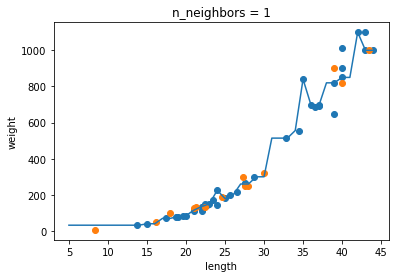

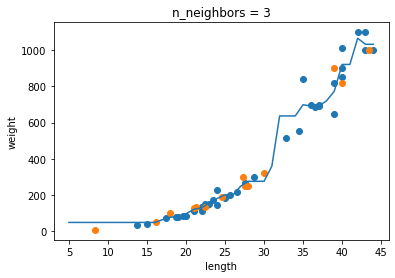

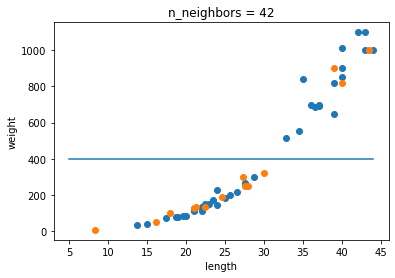

In [14]:
x = np.arange(5, 45).reshape(-1, 1)
for n in [1, 3, 42]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

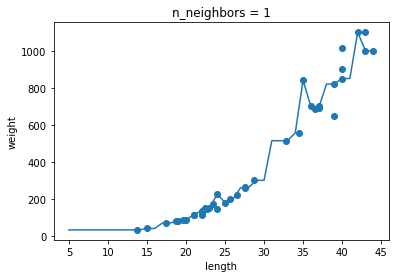

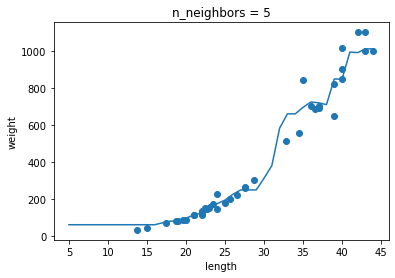

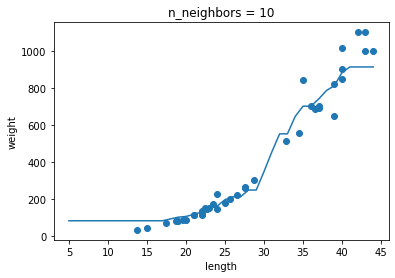

In [13]:
# 확인문제
knr = KNeighborsRegressor()

#5에서 45까지 x 좌표
x = np.arange(5, 45).reshape(-1, 1)

#예측 결과 그래프
for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()